In [58]:
import pandas as he
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [59]:
ha= sns.load_dataset("tips")
print(ha.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [60]:
ha.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [61]:
ha["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

<Axes: xlabel='sex'>

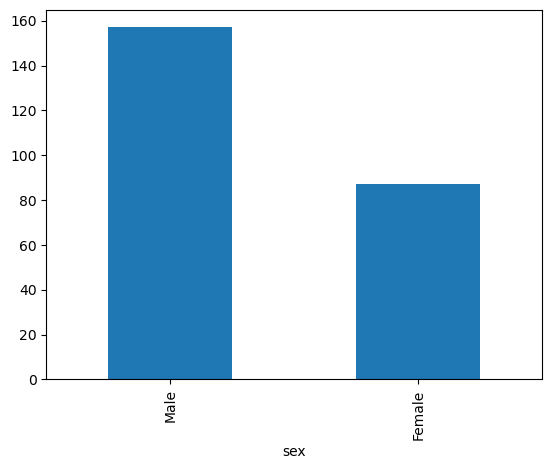

In [62]:
ha["sex"].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

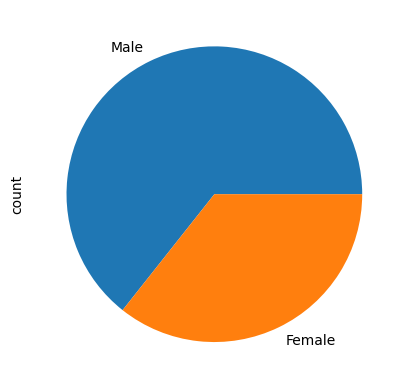

In [63]:
ha["sex"].value_counts().plot(kind="pie")

In [64]:
ha.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [65]:
ha.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [66]:
ha["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [67]:
he.crosstab(ha['sex'],ha['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [68]:
ha['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [69]:
he.crosstab(ha['sex'],ha['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [70]:
label_encoder= LabelEncoder()
ha['sex'] = label_encoder.fit_transfrom(ha['sex'])
ha['smoker'] = label_encoder.fit_transfrom(ha['smoker'])
ha['day'] = label_encoder.fit_transfrom(ha['day'])

x = ha.drop(['time'],axis=1)
y = ha['time']

AttributeError: 'LabelEncoder' object has no attribute 'fit_transfrom'

In [71]:
label_encoder = LabelEncoder()
ha['sex'] = label_encoder.fit_transform(ha['sex'])
ha['smoker'] = label_encoder.fit_transform(ha['smoker'])
ha['day'] = label_encoder.fit_transform(ha['day'])

x = ha.drop(['time'],axis=1)
y = ha['time']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [73]:
dt_clf = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)

In [74]:
print("Decision Tree Classifier Report:")
print(classification_report(y_test,dt_pred))
print("Accuracy:",accuracy_score(y_test,dt_pred))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

      Dinner       0.94      0.94      0.94        34
       Lunch       0.87      0.87      0.87        15

    accuracy                           0.92        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.92      0.92      0.92        49

Accuracy: 0.9183673469387755


In [75]:
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'x[4] <= 2.5\ngini = 0.396\nsamples = 195\nvalue = [142, 53]'),
 Text(0.3, 0.625, 'x[4] <= 0.5\ngini = 0.09\nsamples = 148\nvalue = [141, 7]'),
 Text(0.2, 0.375, 'x[0] <= 16.295\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.1, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(0.7, 0.625, 'x[0] <= 18.53\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.8, 0.375, 'x[0] <= 18.93\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

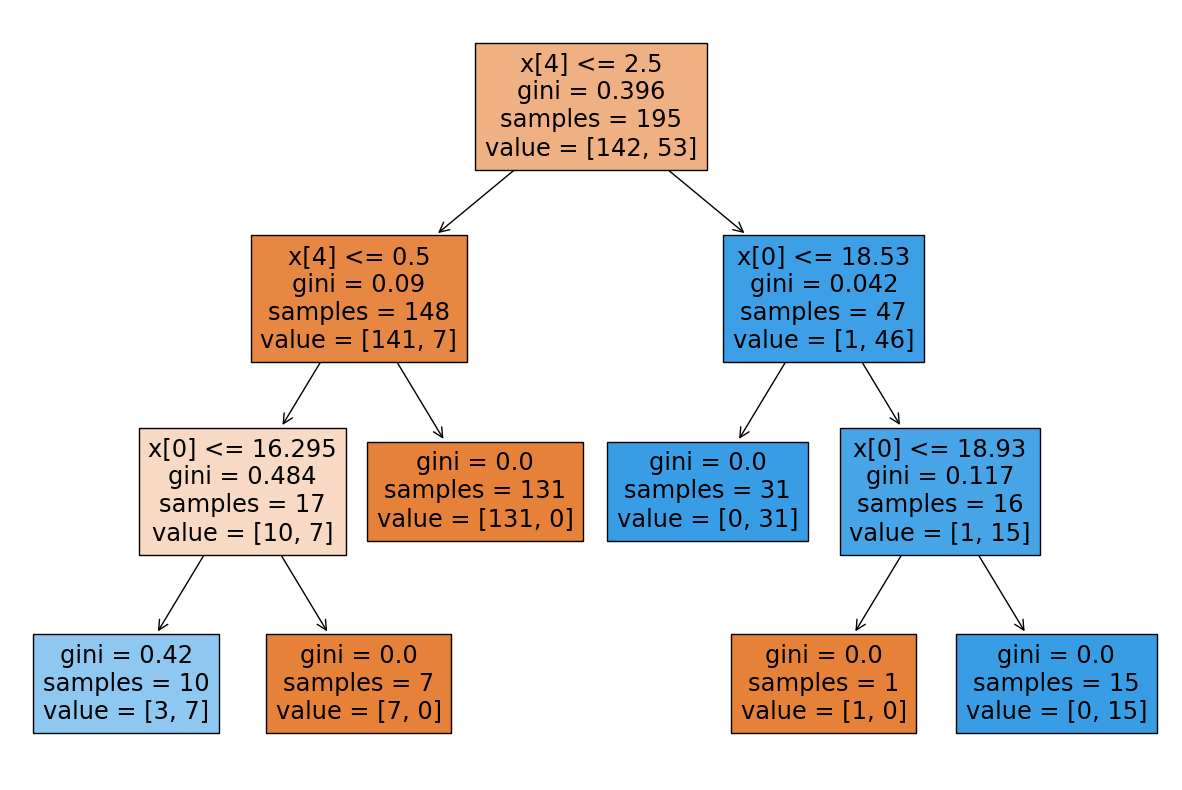

In [80]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf,filled=True)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
from sklearn.metrics import accuracy_score,classification_report

In [98]:
knn=KNeighborsClassifier()

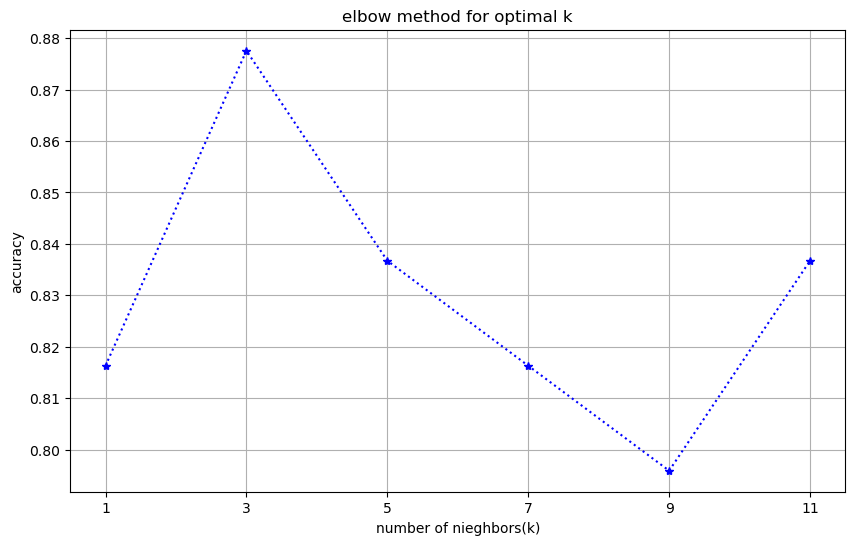

In [102]:
k_values=list(range(1,12,2))
accuracy_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
                       
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(k_values,accuracy_scores,marker='*',linestyle=':',color="blue")
plt.title("elbow method for optimal k")
plt.xlabel("number of nieghbors(k)")
plt.ylabel("accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()
    
    

In [ ]:
print 